<a href="https://colab.research.google.com/github/saincoder/Deep_learning_with_tensorflow/blob/main/Autoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
!pip install -U scikit-learn

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

***Load the dataset***

In [35]:
#load the data
housing = fetch_california_housing()

***Spliting the data into traning data and testing data***

In [36]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)

X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

***Standardize the data***

In [37]:
scaler = StandardScaler()

In [38]:
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

***Autoencoders***

In [45]:
#define autoencoder model
input_dim = X_train.shape[1]

In [46]:
encoder = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation = 'relu', input_shape = [input_dim]),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'relu')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [47]:
decoder = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation = 'relu', input_shape = [32]),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(input_dim)
])

In [52]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

In [48]:
autoencoder = tf.keras.Sequential([encoder, decoder])

In [49]:
autoencoder.compile(loss = 'mse', optimizer = 'adam')

In [50]:
history = autoencoder.fit(X_train, X_train, epochs = 20, validation_data = (X_valid, X_valid))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.3644 - val_loss: 3.0995
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0260 - val_loss: 3.0429
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0257 - val_loss: 3.6442
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0561 - val_loss: 6.7185
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0264 - val_loss: 13.3401
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0359 - val_loss: 5.2134
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0823 - val_loss: 7.3059
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0470 - val_loss: 4.2606
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2402 - val_loss: 5.1328
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0286 - val_loss: 3.0344
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0662 - val_loss: 1.5647
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/ste

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


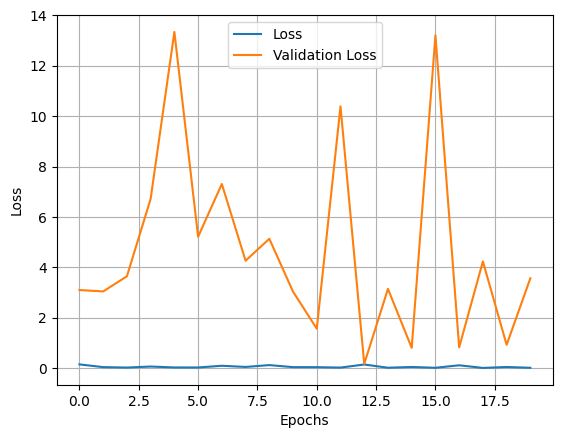

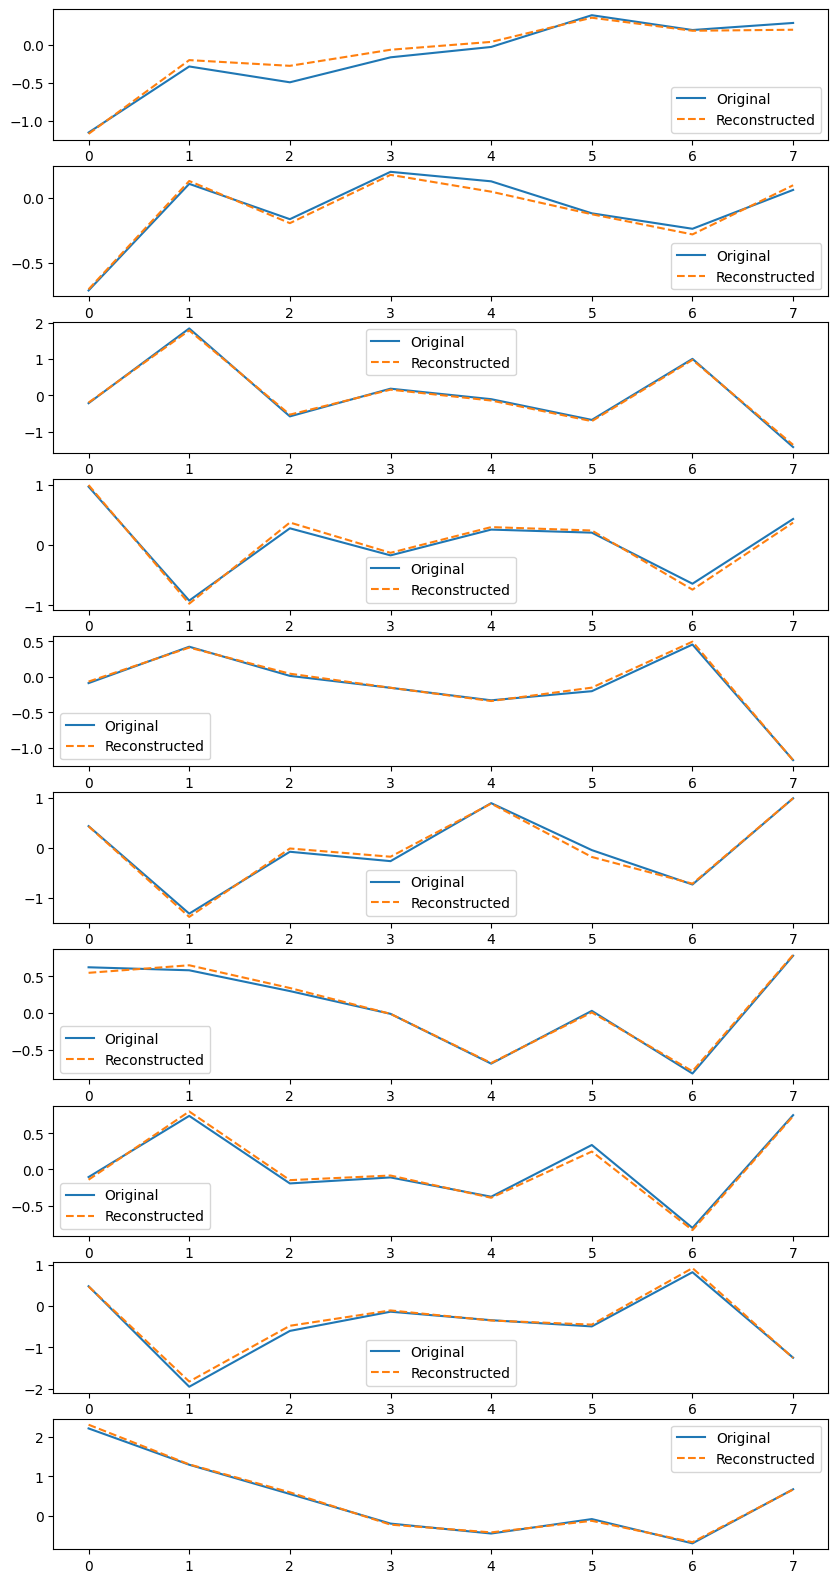

In [53]:
# Plot the training loss and save it
plot_loss(history)

# Visualize the original vs reconstructed data using line plots
def plot_reconstruction(model, n=10):
    samples = X_test[:n]
    reconstructed_samples = model.predict(samples)

    fig, axs = plt.subplots(n, 1, figsize=(10, 20))
    for i in range(n):
        axs[i].plot(samples[i], label="Original")
        axs[i].plot(reconstructed_samples[i], label="Reconstructed", linestyle='--')
        axs[i].legend()

plot_reconstruction(autoencoder)